In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

In [3]:
fm.fontManager.addfont('../../../figs/plus-jakarta-sans/static/PlusJakartaSans-Regular.ttf')

# Set the font as the default for all text elements
plt.rcParams['font.family'] = "Plus Jakarta Sans"
plt.rcParams['font.sans-serif'] = "Plus Jakarta Sans"

In [4]:
spearman_with_ll_df = pd.read_csv('spearman_df_with_ll.csv')
zero_shot_df = pd.read_csv('zero_shot_fitness_spearman_by_dms_epoch.csv')

In [5]:
spearman_with_ll_df.head()

,DMS ID,Site-Independent,EVmutation,DeepSequence (single),DeepSequence (ensemble),EVE (single),EVE (ensemble),Unirep,Unirep evotuned,MSA Transformer (single),...,Selection Type,UniProt ID,MSA_Neff_L_category,Taxon,ESM2 (15B) Log Likelihood,ESM2 (3B) Log Likelihood,ESM2 (650M) Log Likelihood,ESM2 (150M) Log Likelihood,ESM2 (35M) Log Likelihood,ESM2 (8M) Log Likelihood
0,A0A140D2T1_ZIKV_Sourisseau_2019,0.383,0.354,0.131,0.103,0.394,0.405,-0.133,0.062,0.475,...,OrganismalFitness,A0A140D2T1_ZIKV,Medium,Virus,-1.4080,-1.479018,-1.952964,-2.168351,-2.260805,-2.060821
1,A0A192B1T2_9HIV1_Haddox_2018,0.481,0.407,0.413,0.432,0.509,0.516,0.000,0.513,0.514,...,OrganismalFitness,A0A192B1T2_9HIV1,Medium,Virus,-1.6620,-1.699627,-1.864374,-1.818576,-1.830188,-1.893501
2,A0A1I9GEU1_NEIME_Kennouche_2019,-0.011,0.044,0.107,0.098,0.053,0.054,-0.024,0.084,0.094,...,Activity,A0A1I9GEU1_NEIME,Medium,Prokaryote,-1.1840,-1.387086,-1.185322,-1.381840,-1.565267,-1.622645
3,A0A247D711_LISMN_Stadelmann_2021,0.436,0.459,0.109,0.041,0.428,0.428,0.003,0.026,0.345,...,Activity,A0A247D711_LISMN,High,Eukaryote,-1.4210,-1.415575,-1.411188,-1.335261,-1.437162,-1.377371
4,A0A2Z5U3Z0_9INFA_Doud_2016,0.478,0.473,0.484,0.517,0.545,0.548,0.009,0.492,0.164,...,OrganismalFitness,A0A2Z5U3Z0_9INFA,Medium,Virus,-0.3782,-0.463995,-0.601489,-1.953424,-1.908339,-1.991275


In [6]:
zero_shot_df.head()

,dms,epoch,avg_zero_shot_fitness_spearman
0,A0A140D2T1_ZIKV_Sourisseau_2019,-1,0.215989
1,A0A140D2T1_ZIKV_Sourisseau_2019,0,0.217825
2,A0A140D2T1_ZIKV_Sourisseau_2019,1,0.225999
3,A0A140D2T1_ZIKV_Sourisseau_2019,2,0.238962
4,A0A140D2T1_ZIKV_Sourisseau_2019,3,0.242050


In [7]:
# join the zero shot fitness with the spearman correlation using column 'dms' and 'DMS ID' and only
# add the 'ESM2 (650M) Log Likelihood' 
zero_shot_df = zero_shot_df.merge(spearman_with_ll_df[['DMS ID', "Selection Type", 'ESM2 (650M) Log Likelihood']], left_on='dms', right_on='DMS ID')

In [8]:
zero_shot_df.head()

,dms,epoch,avg_zero_shot_fitness_spearman,DMS ID,Selection Type,ESM2 (650M) Log Likelihood
0,A0A140D2T1_ZIKV_Sourisseau_2019,-1,0.215989,A0A140D2T1_ZIKV_Sourisseau_2019,OrganismalFitness,-1.952964
1,A0A140D2T1_ZIKV_Sourisseau_2019,0,0.217825,A0A140D2T1_ZIKV_Sourisseau_2019,OrganismalFitness,-1.952964
2,A0A140D2T1_ZIKV_Sourisseau_2019,1,0.225999,A0A140D2T1_ZIKV_Sourisseau_2019,OrganismalFitness,-1.952964
3,A0A140D2T1_ZIKV_Sourisseau_2019,2,0.238962,A0A140D2T1_ZIKV_Sourisseau_2019,OrganismalFitness,-1.952964
4,A0A140D2T1_ZIKV_Sourisseau_2019,3,0.242050,A0A140D2T1_ZIKV_Sourisseau_2019,OrganismalFitness,-1.952964


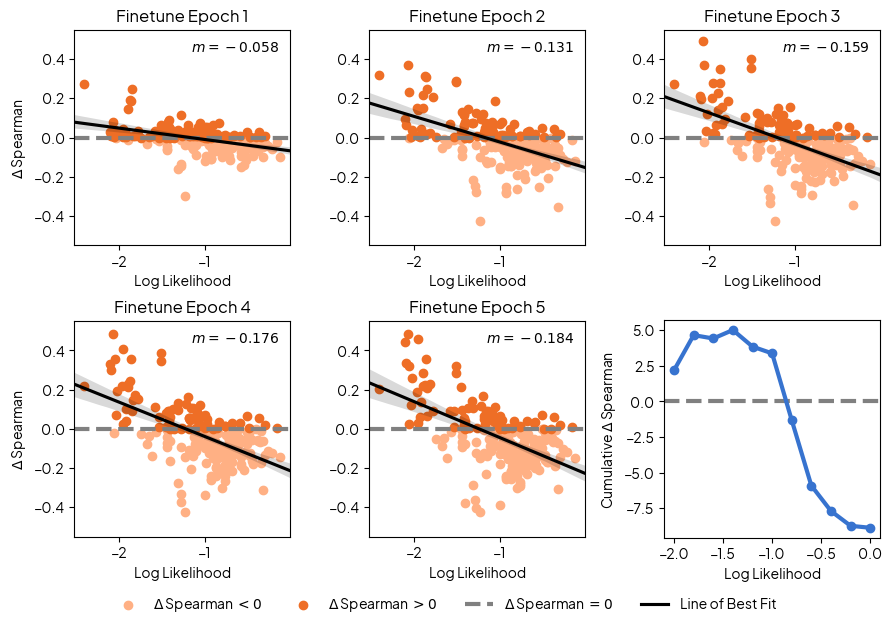

In [9]:
multiple = 3
fig, axs = plt.subplots(2, 3, figsize=(3 * multiple, 2 * multiple))
axs = axs.flatten()

reg_params = []

for i in range(5):
    epoch = i
    epoch_data = zero_shot_df[zero_shot_df['epoch'] == epoch]['avg_zero_shot_fitness_spearman'].to_numpy()
    epoch_neg_1 = zero_shot_df[zero_shot_df['epoch'] == -1]['avg_zero_shot_fitness_spearman'].to_numpy()
    delta = epoch_data - epoch_neg_1
    
    ax = axs[i]
    # ax.set_facecolor("#FFF5E9")
    ax.scatter(zero_shot_df[zero_shot_df['epoch'] == -1]['ESM2 (650M) Log Likelihood'][delta < 0], delta[delta < 0], color='#FFB084')
    ax.scatter(zero_shot_df[zero_shot_df['epoch'] == -1]['ESM2 (650M) Log Likelihood'][delta > 0], delta[delta > 0], color='#EE6E26')
    ax.axhline(0, color='gray', linestyle='--', linewidth=3)
    
    m, b = np.polyfit(zero_shot_df[zero_shot_df['epoch'] == -1]['ESM2 (650M) Log Likelihood'], delta, 1)
    reg_params.append((m, b))
    # ax.axline((-1, b-m), slope=m, color='black', linewidth=3)
    sns.regplot(x=zero_shot_df[zero_shot_df['epoch'] == -1]['ESM2 (650M) Log Likelihood'], y=delta, ax=ax, scatter=False, color='black', ci=95,
                    truncate=False)
    # add confidence shading
    
    # add text to top right of each subplot showing the slope
    ax.text(0.95, 0.95, f'$m={m:.3f}$', transform=ax.transAxes, ha='right', va='top')
    
    ax.set_xlabel('Log Likelihood')
    if i == 0 or i == 3:
        ax.set_ylabel('$\Delta$ Spearman')
    ax.set_title(f'Finetune Epoch {epoch+1}')
    ax.set_ylim(-0.55, 0.55)
    ax.set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
    ax.set_box_aspect(1)
    if i == 1:
        fig.legend(['$\Delta$ Spearman $< 0$', '$\Delta$ Spearman $> 0$', '$\Delta$ Spearman $= 0$', 'Line of Best Fit'], 
            loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05), frameon=False)
    
ax = axs[5]
# plot the cumulative change in spearman correlation at 11 equally spaced lls from -2 to -1
thresholds = np.linspace(-2, 0, 11)
cumulative_change = [delta[zero_shot_df[zero_shot_df['epoch'] == -1]['ESM2 (650M) Log Likelihood'] < ll].sum() for ll in thresholds]
ax.axhline(0, color='gray', linestyle='--', linewidth=3)
ax.plot(thresholds, cumulative_change, 'o-', color='#3773CF', linewidth=3)
# ax.plot(thresholds, cumulative_change, 'o-', color='#054EBC', linewidth=3)
ax.set_xlabel('Log Likelihood')
ax.set_ylabel('Cumulative $\Delta$ Spearman')

# Adjust the layout to make room for the legend
plt.tight_layout()

# Add the legend below the subplots

# save to pdf
plt.savefig('finetune.svg', bbox_inches='tight')

In [10]:
# grab all epoch -1 data for ll >= -1.4
high_ll = zero_shot_df[zero_shot_df['epoch'] == -1][zero_shot_df[zero_shot_df['epoch'] == -1]['ESM2 (650M) Log Likelihood'] >= -1.4]
low_ll = zero_shot_df[zero_shot_df['epoch'] == 4][zero_shot_df[zero_shot_df['epoch'] == 4]['ESM2 (650M) Log Likelihood'] < -1.4]
# concatenate the high and low ll dataframes
high_low_ll = pd.concat([high_ll, low_ll])

In [11]:
high_low_ll.head()

,dms,epoch,avg_zero_shot_fitness_spearman,DMS ID,Selection Type,ESM2 (650M) Log Likelihood
12,A0A1I9GEU1_NEIME_Kennouche_2019,-1,0.029736,A0A1I9GEU1_NEIME_Kennouche_2019,Activity,-1.185322
24,A0A2Z5U3Z0_9INFA_Doud_2016,-1,0.506684,A0A2Z5U3Z0_9INFA_Doud_2016,OrganismalFitness,-0.601489
30,A0A2Z5U3Z0_9INFA_Wu_2014,-1,0.463992,A0A2Z5U3Z0_9INFA_Wu_2014,OrganismalFitness,-0.601489
36,A4D664_9INFA_Soh_2019,-1,0.148796,A4D664_9INFA_Soh_2019,OrganismalFitness,-1.142134
42,A4GRB6_PSEAI_Chen_2020,-1,0.738149,A4GRB6_PSEAI_Chen_2020,OrganismalFitness,-0.771111


In [12]:
high_low_ll.tail()

,dms,epoch,avg_zero_shot_fitness_spearman,DMS ID,Selection Type,ESM2 (650M) Log Likelihood
1115,SPIKE_SARS2_Starr_2020_expression,4,0.331582,SPIKE_SARS2_Starr_2020_expression,Expression,-1.512191
1169,SYUA_HUMAN_Newberry_2020,4,0.231075,SYUA_HUMAN_Newberry_2020,OrganismalFitness,-1.435256
1181,TAT_HV1BR_Fernandes_2016,4,0.340060,TAT_HV1BR_Fernandes_2016,OrganismalFitness,-2.051248
1253,UBR5_HUMAN_Tsuboyama_2023_1I2T,4,0.399898,UBR5_HUMAN_Tsuboyama_2023_1I2T,Stability,-2.402984
1283,VRPI_BPT7_Tsuboyama_2023_2WNM,4,0.580389,VRPI_BPT7_Tsuboyama_2023_2WNM,Stability,-1.437985


In [13]:
# get average across entire dataset and for each unique selection type
meta_avg = high_low_ll['avg_zero_shot_fitness_spearman'].mean()
selection_avgs = {selection: high_low_ll[high_low_ll['Selection Type'] == selection]['avg_zero_shot_fitness_spearman'].mean() for selection in high_low_ll['Selection Type'].unique()}
weighted_avg = sum([selection_avgs[selection] for selection in selection_avgs]) / len(selection_avgs)


In [14]:
print(f"Meta Avg: {meta_avg}")
for selection, avg in selection_avgs.items():
    print(f"{selection} Avg: {avg}")
print(f"Weighted Avg: {weighted_avg}")

Meta Avg: 0.46221116781356536
Activity Avg: 0.46114736927789407
OrganismalFitness Avg: 0.4252043615202238
Stability Avg: 0.5337245231235358
Binding Avg: 0.3563334463514417
Expression Avg: 0.4373109650452724
Weighted Avg: 0.44274413306367355


In [15]:
# perform the same analysis as above but don't filter the 5th epoch data
naive_meta_avg = zero_shot_df[zero_shot_df['epoch'] == 4]['avg_zero_shot_fitness_spearman'].mean()
naive_selection_avgs = {selection: zero_shot_df[zero_shot_df['epoch'] == 4][zero_shot_df[zero_shot_df['epoch'] == 4]['Selection Type'] == selection]['avg_zero_shot_fitness_spearman'].mean() for selection in zero_shot_df[zero_shot_df['epoch'] == 4]['Selection Type'].unique()}
naive_weighted_avg = sum([naive_selection_avgs[selection] for selection in naive_selection_avgs]) / len(naive_selection_avgs)
# then same for the 0th epoch
naive_meta_avg_0 = zero_shot_df[zero_shot_df['epoch'] == -1]['avg_zero_shot_fitness_spearman'].mean()
naive_selection_avgs_0 = {selection: zero_shot_df[zero_shot_df['epoch'] == -1][zero_shot_df[zero_shot_df['epoch'] == -1]['Selection Type'] == selection]['avg_zero_shot_fitness_spearman'].mean() for selection in zero_shot_df[zero_shot_df['epoch'] == -1]['Selection Type'].unique()}
naive_weighted_avg_0 = sum([naive_selection_avgs_0[selection] for selection in naive_selection_avgs_0]) / len(naive_selection_avgs_0)

In [16]:
print(f"Naive Meta Avg: {naive_meta_avg}")
for selection, avg in naive_selection_avgs.items():
    print(f"Naive {selection} Avg: {avg}")
print(f"Naive Weighted Avg: {naive_weighted_avg}")
print("###############################")
print(f"Naive Meta Avg 0: {naive_meta_avg_0}")
for selection, avg in naive_selection_avgs_0.items():
    print(f"Naive {selection} Avg 0: {avg}")
print(f"Naive Weighted Avg 0: {naive_weighted_avg_0}")

Naive Meta Avg: 0.3981907947082167
Naive OrganismalFitness Avg: 0.3851274660209873
Naive Activity Avg: 0.39131787448035876
Naive Stability Avg: 0.444090429798796
Naive Binding Avg: 0.271183841760554
Naive Expression Avg: 0.3939200364335471
Naive Weighted Avg: 0.3771279296988487
###############################
Naive Meta Avg 0: 0.43908291863637966
Naive OrganismalFitness Avg 0: 0.3901709957552257
Naive Activity Avg 0: 0.44122493750449876
Naive Stability Avg 0: 0.5233442202805666
Naive Binding Avg 0: 0.3271980140603433
Naive Expression Avg 0: 0.41504786871926114
Naive Weighted Avg 0: 0.41939720726397917


In [17]:
spearman_with_ll_df.columns

Index(['DMS ID', 'Site-Independent', 'EVmutation', 'DeepSequence (single)',
       'DeepSequence (ensemble)', 'EVE (single)', 'EVE (ensemble)', 'Unirep',
       'Unirep evotuned', 'MSA Transformer (single)',
       'MSA Transformer (ensemble)', 'ESM-1b', 'ESM-1v (single)',
       'ESM-1v (ensemble)', 'ESM2 (8M)', 'ESM2 (35M)', 'ESM2 (150M)',
       'ESM2 (650M)', 'ESM2 (3B)', 'ESM2 (15B)', 'Wavenet', 'RITA S', 'RITA M',
       'RITA L', 'RITA XL', 'Progen2 S', 'Progen2 M', 'Progen2 Base',
       'Progen2 L', 'Progen2 XL', 'GEMME', 'VESPA', 'VESPAl', 'ProtGPT2',
       'Tranception S no retrieval', 'Tranception M no retrieval',
       'Tranception L no retrieval', 'Tranception S', 'Tranception M',
       'Tranception L', 'TranceptEVE S', 'TranceptEVE M', 'TranceptEVE L',
       'CARP (38M)', 'CARP (600K)', 'CARP (640M)', 'CARP (76M)', 'MIF',
       'MIF-ST', 'ESM-IF1', 'ProteinMPNN', 'Number of Mutants',
       'Selection Type', 'UniProt ID', 'MSA_Neff_L_category', 'Taxon',
       'ESM2

In [18]:
# models of interest
# plms
#   Progen2 XL
#   ESM2 (650M)
# alignment models
#   EVE
# hybrid alignment models
#   MSA transformer
#   trancepteve

In [19]:
def print_stats(model_name):
    print("###############################")
    print(f"Model: {model_name}")
    # formatting so we can copy paste into https://www.tablesgenerator.com/#
    header = """<meta charset='utf-8'><table><tr>"""
    element = """<td class="selected" style="vertical-align: top;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>{val}</span></p></div></div></td>"""
    footer = """</tr></table>"""
    values = []
    selection_types = ["Activity", "Binding", "Expression", "OrganismalFitness", "Stability"]
    for selection in selection_types:
        selection_avg = spearman_with_ll_df[spearman_with_ll_df['Selection Type'] == selection][model_name].mean()
        # append selection average rounded to the nearest thousandths
        values.append(round(selection_avg, 3))
    meta_avg = spearman_with_ll_df[model_name].mean()
    values.append(round(meta_avg, 3))
    weighted_avg = sum([spearman_with_ll_df[spearman_with_ll_df['Selection Type'] == selection][model_name].mean() for selection in spearman_with_ll_df['Selection Type'].unique()]) / len(spearman_with_ll_df['Selection Type'].unique())
    values.append(round(weighted_avg, 3))
    print(header + "".join([element.format(val=val) for val in values]) + footer)
    print("###############################")

In [20]:
models = [
    "Progen2 XL",
    "EVE (single)", 
    "MSA Transformer (single)",
    "TranceptEVE L"
]
for model in models:
    print_stats(model)

###############################
Model: Progen2 XL
<meta charset='utf-8'><table><tr><td class="selected" style="vertical-align: top;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0.404</span></p></div></div></td><td class="selected" style="vertical-align: top;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0.291</span></p></div></div></td><td class="selected" style="vertical-align: top;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0.418</span></p></div></div></td><td class="selected" style="vertical-align: top;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0.389</span></p></div></div></td><td class="selected" style="vertical-align: top;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0.445</span></p></div></div></td><td class="selected" style="vertical-align: top;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0.406</span></p></div></div></td><td class="selected" style="vertical-align: top;"><div class="wrap"><di